In [1]:
import wandb
import pandas as pd

In [2]:
# Fetch artifact sample.csv in latest version
# use save_code=True so the notebook is uploaded to W&B
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:v1").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: midnightskyuniverse (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Import pandas profilling to create profile of imported data
import pandas_profiling

In [8]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Drop price outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Drop locations outisde of NY
idx = df['longitude'].between(-74.25, -73.50) & df['latitude'].between(40.5, 41.2)
df = df[idx].copy()
# Drop entries where minimum_nights > 365
idx = df['minimum_nights'].between(0,365,inclusive='both')
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])
# Reset index to avoid creating df_index by pandas_profiling
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46414 entries, 0 to 46413
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46414 non-null  int64         
 1   name                            46399 non-null  object        
 2   host_id                         46414 non-null  int64         
 3   host_name                       46393 non-null  object        
 4   neighbourhood_group             46414 non-null  object        
 5   neighbourhood                   46414 non-null  object        
 6   latitude                        46414 non-null  float64       
 7   longitude                       46414 non-null  float64       
 8   room_type                       46414 non-null  object        
 9   price                           46414 non-null  int64         
 10  minimum_nights                  46414 non-null  int64         
 11  nu

<AxesSubplot:xlabel='last_review', ylabel='number_of_reviews'>

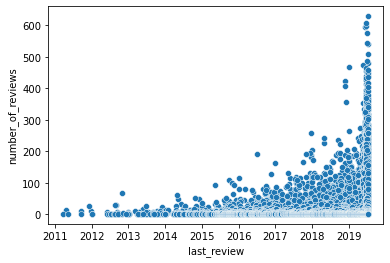

In [21]:
import seaborn as sns
sns.scatterplot(x=df['last_review'], y=df['number_of_reviews'])

In [59]:
# Drop entries which have not got a reivew since 2013
idx = df['last_review'].gt(pd.Timestamp(2013, 1, 1, 12))
df = df[idx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37207 entries, 0 to 46371
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              37207 non-null  int64         
 1   name                            37201 non-null  object        
 2   host_id                         37207 non-null  int64         
 3   host_name                       37191 non-null  object        
 4   neighbourhood_group             37207 non-null  object        
 5   neighbourhood                   37207 non-null  object        
 6   latitude                        37207 non-null  float64       
 7   longitude                       37207 non-null  float64       
 8   room_type                       37207 non-null  object        
 9   price                           37207 non-null  int64         
 10  minimum_nights                  37207 non-null  int64         
 11  nu

In [ ]:
run.finish()